In [18]:
import re

import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

import math

import nltk

from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict

data = pd.read_csv('IMDB.csv')

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [19]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    return result
data['review']=data['review'].apply(lambda cw : remove_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
reviews = data['review'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
#The dataset is then split into 80% train and 20% test parts using train_test_split from sklearn.model_selection.

train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [22]:
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [23]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [33]:


import re

import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

import math

import nltk

from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict

data = pd.read_csv('IMDB.csv')

data
 

def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    return result
data['review']=data['review'].apply(lambda cw : remove_tags(cw)) 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#Finally, we perform lemmatization on the text. Lemmatization is used to find the root form of words or lemmas in NLP. For example, the lemma of the words reading, reads, read is read. This helps save unnecessary computational overhead in trying to decipher entire words since the meanings of most words are well-expressed by their separate lemmas. We perform lemmatization using the WordNetLemmatizer() from nltk. The text is first broken into individual tokens/ words using the WhitespaceTokenizer() from nltk. We write a function lemmatize_text to perform lemmatization on the individual words.

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)


reviews = data['review'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(train_sentences)
vocab = vec.get_feature_names_out()
X = X.toarray()
word_counts = {}
for l in range(2):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = train_labels[i]
    for j in range(len(vocab)):
        word_counts[l][vocab[j]] += X[i][j]


def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)


def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
labels = [0,1]
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

Accuracy of prediction on test set :  0.49992


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Read the dataset
data = pd.read_csv('IMDB.csv')

# Function to preprocess the text
def preprocess_text(text):
    # Remove HTML tags and URLs
    result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', text)
    result = re.sub('<.*?>', '', result)
    
    # Remove non-alphanumeric characters
    result = re.sub(r'[^a-zA-Z\s]', ' ', result)
    
    # Convert to lowercase
    result = result.lower()
    
    return result

# Apply the preprocessing function to the 'review' column
data['review'] = data['review'].apply(preprocess_text)

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatization
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
data['review'] = data['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(x)]))

# Split the data into features and labels
X = data['review']
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 84.89%
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



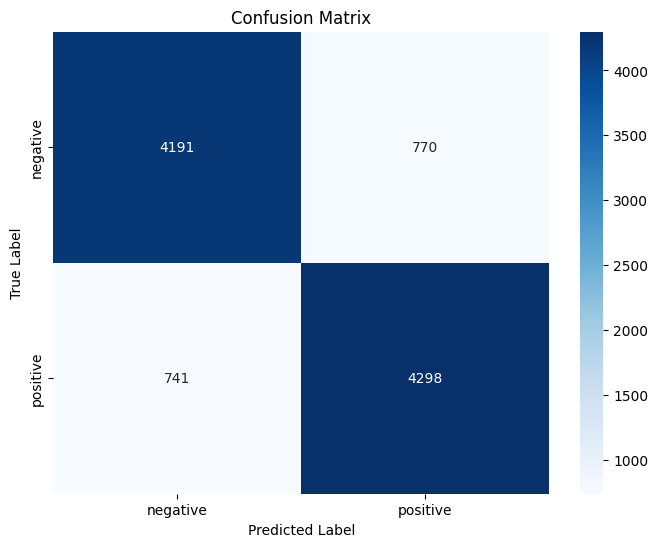

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# ... (previous code remains unchanged)

# Train the Multinomial Naive Bayes model on the entire dataset
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the training set
y_train_pred = nb_classifier.predict(X_train_vec)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# ... (rest of the code remains unchanged)


Training Accuracy: 85.00%


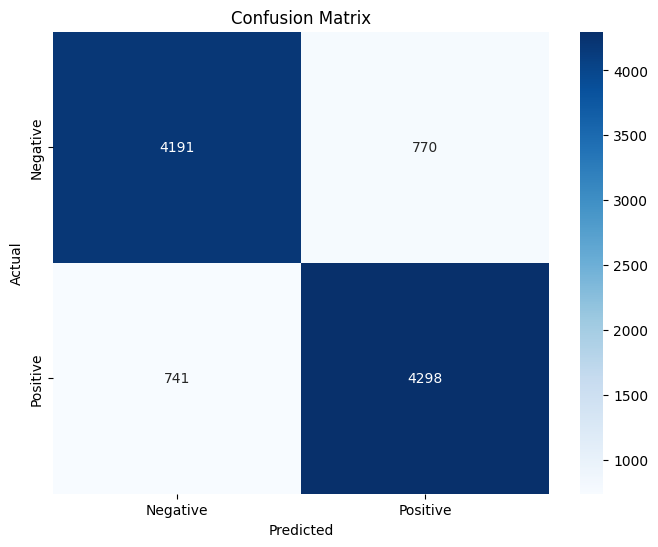

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc



# Draw a precision-recall curve
y_prob = nb_classifier.predict_proba(X_test_vec)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Draw an ROC curve


ValueError: y_true takes value in {'negative', 'positive'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

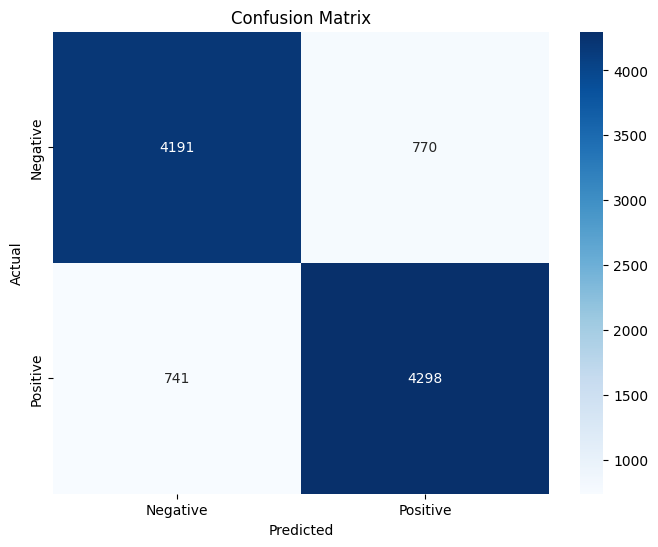

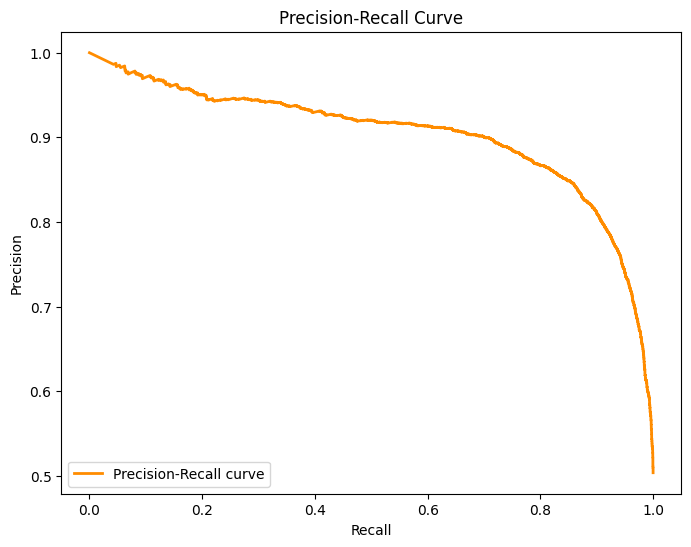

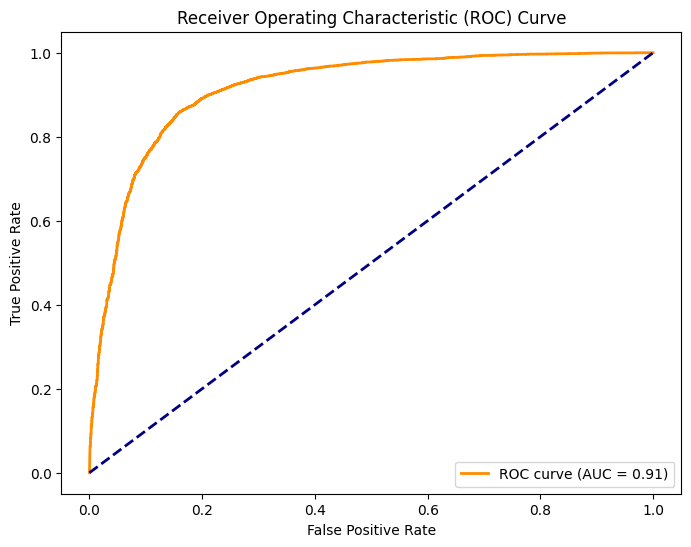

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Convert string labels to binary labels
y_test_binary = y_test.map({'negative': 0, 'positive': 1})
y_pred_binary = pd.Series(y_pred).map({'negative': 0, 'positive': 1})

# Draw a confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Draw a precision-recall curve
y_prob = nb_classifier.predict_proba(X_test_vec)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Draw an ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [9]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords

# Sample dataset (replace this with your labeled dataset)
data = {'sentence': ['I love this product!', 'This is awful.', 'Amazing!', 'Terrible.'],
        'sentiment': ['positive', 'negative', 'positive', 'negative']}

df = pd.DataFrame(data)

# Clean and preprocess the data
def clean_text(text):
    result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    result = re.sub('<.*?>', '', result)
    result = re.sub(r'[^a-zA-Z\s]', ' ', result)
    result = result.lower()
    return result

# Apply stopwords removal to the 'cleaned_sentence' column
stop_words = set(stopwords.words('english'))

def predict_sentiment(sentence):
    cleaned_sentence = clean_text(sentence)
    cleaned_sentence = ' '.join([word for word in cleaned_sentence.split() if word not in stop_words])
    w_tokenizer = WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(x)]))
    # Vectorize the data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['sentence'])
    y = df['sentiment']

    # Train a Naive Bayes model
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X, y)

    # Vectorize the new sentence
    new_sentence_vectorized = vectorizer.transform([cleaned_sentence])

    # Make the prediction
    predicted_sentiment = nb_classifier.predict(new_sentence_vectorized)

    return predicted_sentiment[0]

# Predict sentiment for a new sentence
new_sentence = "I really like this movie!"
predicted_sentiment = predict_sentiment(new_sentence)

print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: negative


In [10]:
p=0
n=0
data = pd.read_csv('IMDB.csv')
for i in data['sentiment']:
    if(i=="positive"):
        p+=1
    else:
        n+=1
print("p",p,"n",n)

p 25000 n 25000
